In [ ]:
import pandas as pd
import quantstats as qs

In [ ]:
dados_empresas = pd.read_csv("BASE_FINAL_COMPLETA.csv")

In [ ]:
dados_empresas.tail(50)

In [ ]:
dados_empresas['DATA'] = pd.to_datetime(dados_empresas['DATA'])

In [ ]:
dados_empresas['RETORNO'] = dados_empresas.groupby('TICKER')['FECHAMENTO_AJUSTADO'].pct_change()
dados_empresas['RETORNO'] = dados_empresas.groupby('TICKER')['RETORNO'].shift(-1)

In [ ]:
dados_empresas['RANKING_EV_EBIT'] = dados_empresas.groupby('DATA')['EBIT_EV'].rank(ascending = False)
dados_empresas['RANKING_ROIC'] = dados_empresas.groupby('DATA')['ROIC'].rank(ascending = False)

dados_empresas['RANKING_FINAL'] = dados_empresas['RANKING_EV_EBIT'] + dados_empresas['RANKING_ROIC']
dados_empresas['RANKING_FINAL'] = dados_empresas.groupby('DATA')['RANKING_FINAL'].rank()


In [ ]:
dados_empresas[dados_empresas['DATA'] == '2019-12-31'].sort_values('RANKING_FINAL').head(10)

In [ ]:
carteira_top_10 = dados_empresas[dados_empresas['RANKING_FINAL'] <= 10]

In [ ]:
carteira_top_10[carteira_top_10['DATA'] == '2011-10-31']

In [ ]:
rentabilidade_carteira = carteira_top_10.groupby('DATA')['RETORNO'].mean()
rentabilidade_carteira = rentabilidade_carteira.to_frame()

print(rentabilidade_carteira)

In [ ]:
rentabilidade_carteira['RETORNO_MODELO'] = (rentabilidade_carteira['RETORNO'] + 1).cumprod() - 1
rentabilidade_carteira = rentabilidade_carteira.shift(1)
rentabilidade_carteira = rentabilidade_carteira.dropna()
print(rentabilidade_carteira)

In [ ]:
rentabilidade_carteira['RETORNO_MODELO'].plot()

In [ ]:
rentabilidade_carteira[rentabilidade_carteira.index == '2023-09-30']

In [ ]:
import yfinance as yf

ibov = yf.download('^BVSP', '2009-01-01', '2023-10-18')

ibov.index = pd.to_datetime(ibov.index)

mask = ibov.index.isin(rentabilidade_carteira.index)

filtered_ibov = ibov[mask]

filtered_ibov.head()

In [ ]:
filtered_ibov = filtered_ibov.reindex(rentabilidade_carteira.index)
filtered_ibov = filtered_ibov.ffill()

In [ ]:
filtered_ibov.head()

In [ ]:
rentabilidade_carteira.head()

In [ ]:
retornos_ibov.head()

In [ ]:
retornos_ibov = filtered_ibov['Adj Close'].pct_change()
retorno_acumulado_ibov = (1 + retornos_ibov).cumprod() - 1

rentabilidade_carteira['IBOVESPA'] = retorno_acumulado_ibov.values
rentabilidade_carteira = rentabilidade_carteira.drop('RETORNO', axis = 1)

In [30]:
rentabilidade_carteira

,RETORNO_MODELO,IBOVESPA
DATA,,
2011-11-30,-0.027585,NaN
2011-12-31,0.002656,0.000000
2012-01-31,0.067688,0.108958
2012-02-29,0.140239,0.157134
2012-03-31,0.161079,0.157134
...,...,...
2023-06-30,21.986140,1.076255
2023-07-31,22.687594,1.144053
2023-08-31,24.129070,1.035024


In [35]:
rentabilidade_ano = (1 + rentabilidade_carteira.loc['2023-10-18', 'RETORNO_MODELO']) ** (1/7.5) - 1

rentabilidade_ano

0.5311391441531927

In [38]:
rentabilidade_carteira.index = pd.to_datetime(rentabilidade_carteira.index, format='%Y-%m-%d')

rentabilidade_carteira

,RETORNO_MODELO,IBOVESPA
DATA,,
2011-11-30,-0.027585,NaN
2011-12-31,0.002656,0.000000
2012-01-31,0.067688,0.108958
2012-02-29,0.140239,0.157134
2012-03-31,0.161079,0.157134
...,...,...
2023-06-30,21.986140,1.076255
2023-07-31,22.687594,1.144053
2023-08-31,24.129070,1.035024


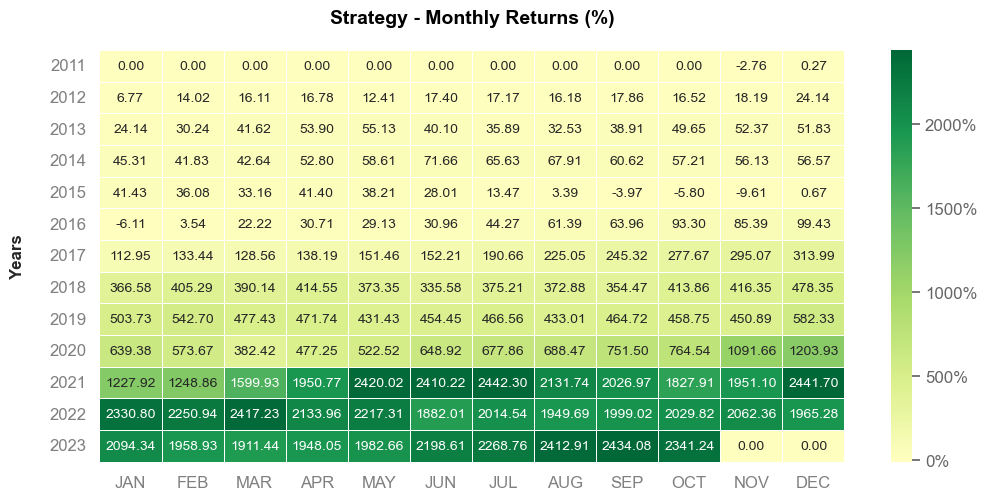

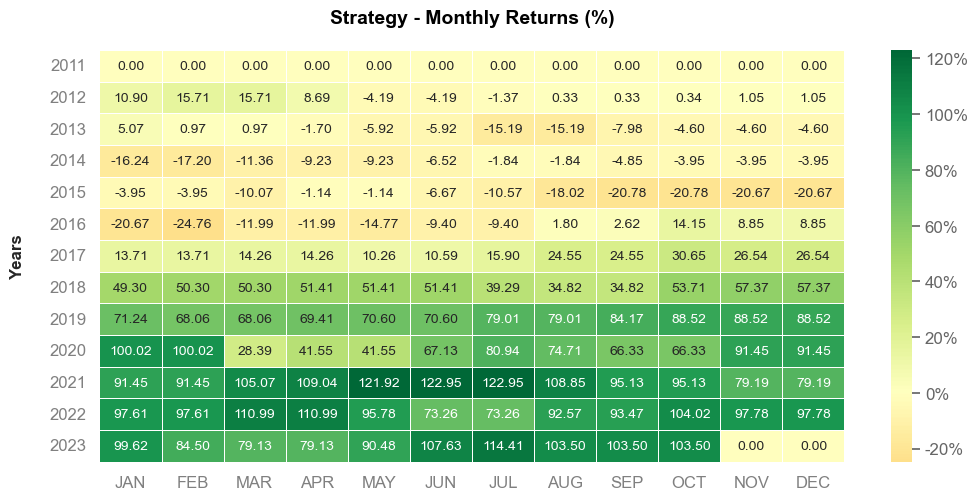

In [42]:
import quantstats as qs
import pandas as pd

qs.extend_pandas()

rentabilidade_carteira['RETORNO_MODELO'].plot_monthly_heatmap()
rentabilidade_carteira['IBOVESPA'].plot_monthly_heatmap()


In [44]:
rentabilidade_ano = (1 + rentabilidade_carteira.loc['2023-10-18', 'RETORNO_MODELO']) ** (1/11.98) - 1

rentabilidade_ano

0.30565130619868097